# HR Analytics: Job Change of Data Scientists

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

**So, we need to predict the target (0, 1) field, which means whether a person will work in a company or not.**

Features: 
    1. enrollee_id: Unique ID for candidate 
    2. city: City code 
    3. city_ development _index : Developement index of the city (scaled) 
    4. gender: Gender of candidate 
    5. relevent_experience: Relevant experience of candidate (To Data Science) 
    6. enrolled_university: Type of University course enrolled  
    7. education_level: Education level of candidate 
    8. major_discipline: Education major discipline of candidate 
    9. experience: Candidate total experience in years 
    10. company_size: No of employees in current employer's company 
    11. company_type: Type of current employer 
    12. lastnewjob: Difference in years between previous job and current job 
    13. training_hours: training hours completed 
    14. target: 0 – Not looking for job change, 1 – Looking for a job change

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder,PowerTransformer,MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE,ADASYN, SVMSMOTE
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn import metrics
from sklearn.compose import make_column_transformer
#import category_encoders as ce
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## 1. Reading data

In [2]:
df_train=pd.read_csv("aug_train.csv")

df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Let`s see unique value

In [4]:
print(df_train.shape)
print(df_train['relevent_experience'].unique())
print(df_train['enrolled_university'].unique())
print(df_train['education_level'].unique())
print(df_train['major_discipline'].unique())
print(df_train['experience'].unique())
print(df_train['company_size'].unique())
print(df_train['company_type'].unique())
print(df_train['last_new_job'].unique())

(19158, 14)
['Has relevent experience' 'No relevent experience']
['no_enrollment' 'Full time course' nan 'Part time course']
['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


In [5]:
null = pd.DataFrame({'No of null values':df_train.isnull().sum(),'Percentage of null values':df_train.isnull().sum()*100/df_train.shape[0]})
null[null['No of null values'] > 0]

,No of null values,Percentage of null values
gender,4508,23.530640
enrolled_university,386,2.014824
education_level,460,2.401086
major_discipline,2813,14.683161
experience,65,0.339284
company_size,5938,30.994885
company_type,6140,32.049274
last_new_job,423,2.207955


Now let`s see distribition of our target 

0.0    14381
1.0     4777
Name: target, dtype: int64


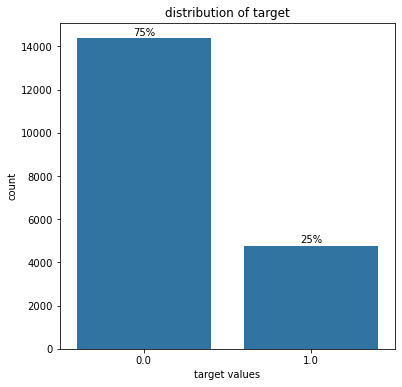

In [6]:
count = df_train.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df_train.target,color = sb.color_palette()[0]);
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /df_train.target.count()))+'%',
              ha='center',
              va = 'top')

We can notice that the data is imbalanced.

Before start collect descriptive statistics and vizualize our data, let`s preprocessing data.

## 2. Exploring data. Visualization and Preprocessing data.

**We can see that our dataset contains 19158 entries and 14 columns. We have 4 numerical variables and 10 categorical variables**

In [7]:
df_train['company_size'] = df_train['company_size'].replace('10/49', '10-49')
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

Drop id of employee, cause we are not interested in it:

In [8]:
df_train.drop(['enrollee_id'], axis = 1, inplace=True)
df_train.shape

(19158, 13)

### Training hours

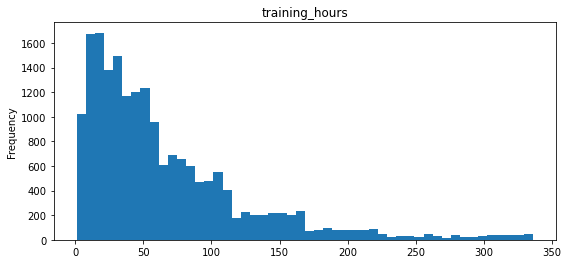

In [9]:
plt.figure(figsize=(9,4))
plt.hist(df_train["training_hours"], color= sb.color_palette()[0] ,bins=50)
plt.ylabel("Frequency")
plt.title('training_hours')
plt.show()

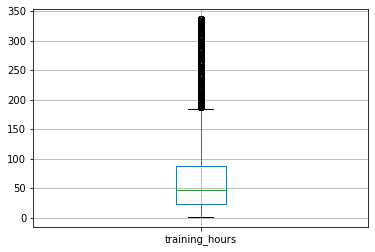

In [10]:
df_train[['training_hours']].boxplot()

We may see, that we have many outliers in this feature:

In [11]:
IQR = df_train[['training_hours']].quantile(0.75) - df_train[['training_hours']].quantile(0.25)


lower_boundary = df_train[['training_hours']].quantile(0.25) - (IQR * 1.5)
upper_boundary = df_train[['training_hours']].quantile(0.75) + (IQR * 1.5)
print('city_development_index Lower outliers = ',df_train.loc[(df_train['training_hours']<lower_boundary[0])].shape[0])
print('city_development_index Upper outliers = ',df_train.loc[(df_train['training_hours']>upper_boundary[0])].shape[0])

city_development_index Lower outliers =  0
city_development_index Upper outliers =  984


### City development index

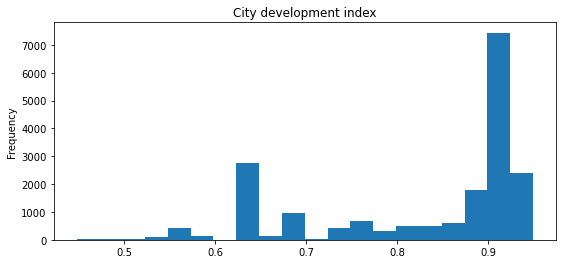

In [12]:
plt.figure(figsize=(9,4))
plt.hist(df_train["city_development_index"], color= sb.color_palette()[0] ,bins=20)
plt.ylabel("Frequency")
plt.title('City development index')
plt.show()

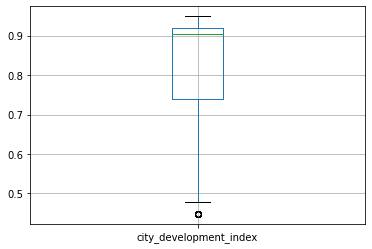

In [13]:
df_train[['city_development_index']].boxplot()

We need to transform city development index before applying the model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A2ABAC8CD0>]],
      dtype=object)

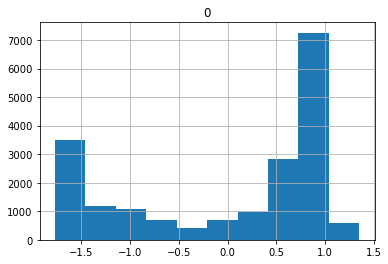

In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
pt.fit(df_train['city_development_index'].values.reshape(-1,1))
tr = pt.transform(df_train['city_development_index'].values.reshape(-1,1))
df_train['city_development_index'] = pd.DataFrame(tr)
pd.DataFrame(tr).hist()

### Gender

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64


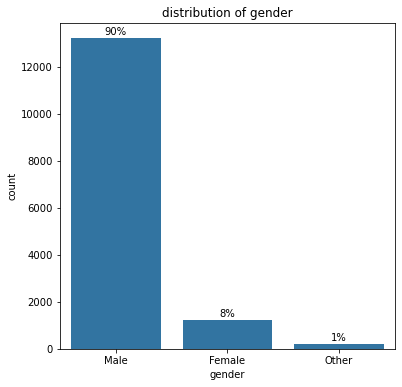

In [15]:
df=pd.read_csv("aug_train.csv")
count = df.gender.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df.gender,color = sb.color_palette()[0]);
plt.title('distribution of gender');
plt.xlabel('gender');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.gender.count()))+'%',
              ha='center',
              va = 'top')

We can notice, more than 90% of men participate in our research

### Relevant Experience

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64


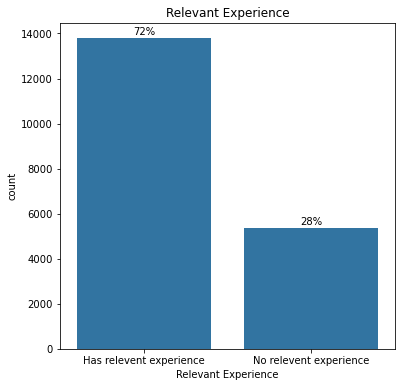

In [16]:
count = df.relevent_experience.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(df.relevent_experience,color = sb.color_palette()[0]);
plt.title('Relevant Experience');
plt.xlabel('Relevant Experience');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.relevent_experience.count()))+'%',
              ha='center',
              va = 'top')

How we can see, over 72% has relevant experience

### Education Level

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64


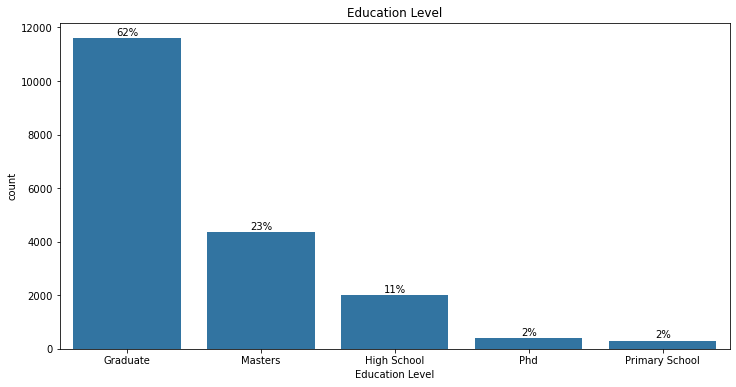

In [17]:
count = df.education_level.value_counts()
print( count )
plt.figure(figsize=(12,6))
sb.countplot(df.education_level,color = sb.color_palette()[0]);
plt.title('Education Level');
plt.xlabel('Education Level');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 400,
            str(round(100*count[i] / df.education_level.count()))+'%',
              ha='center',
              va = 'top')

As well, above 62% has Bachelor`s education

### Major Discipline

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64


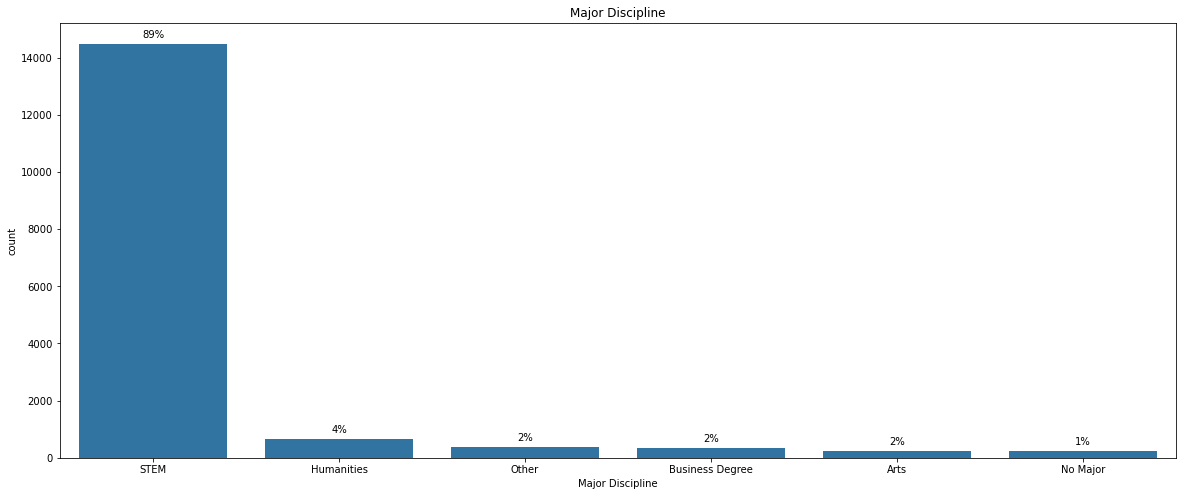

In [18]:
count = df.major_discipline.value_counts()
print( count )
order = count.index
plt.figure(figsize=(20,8))
sb.countplot(df.major_discipline ,color = sb.color_palette()[0],order=order);
plt.title('Major Discipline');
plt.xlabel('Major Discipline');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] / df.major_discipline.count()))+'%',
              ha='center',
              va = 'top')

### Experience

In [19]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

There are lots of categories so we will transform them into 6 categories

In [20]:
df_train['experience'].replace({'1':'1-5',
                                '2':'1-5',
                                '3':'1-5',
                                '4':'1-5',
                                '5':'1-5',
                                '6':'6-10',
                                '7':'6-10',
                                '8':'6-10',
                                '9':'6-10',
                                '10':'6-10',
                                '11':'11-15',
                                '12':'11-15',
                                '13':'11-15',
                                '14':'11-15',
                                '15':'11-15',
                                '16':'16-20',
                                '17':'16-20',
                                '18':'16-20',
                                '19':'16-20',
                                '20':'16-20'},inplace=True)

In [21]:
count = df_train.experience.value_counts()
count

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64

1-5      5863
6-10     5011
>20      3286
11-15    2829
16-20    1582
<1        522
Name: experience, dtype: int64


Text(5, 3486, '17%')

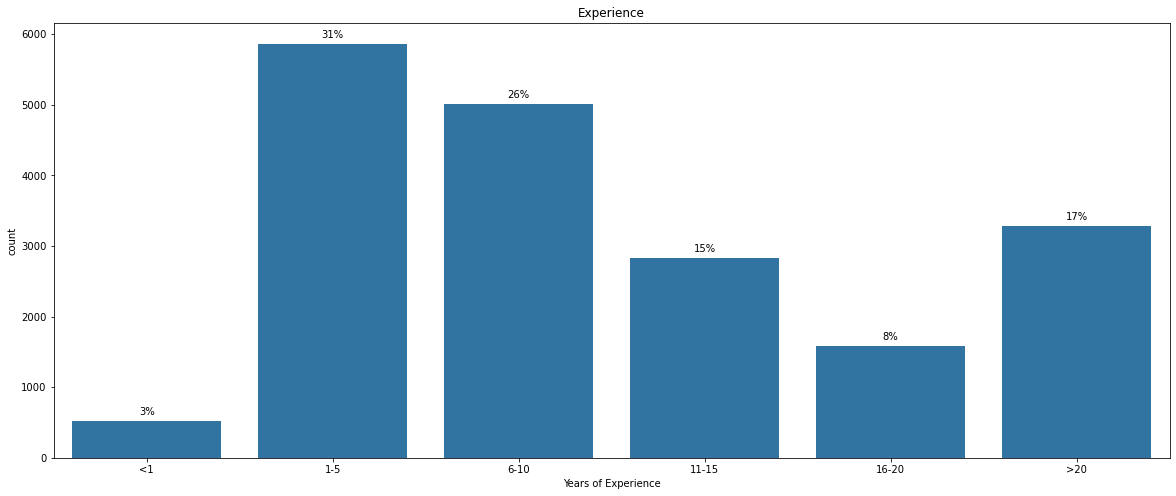

In [22]:
count = df_train.experience.value_counts()
print( count )
plt.figure(figsize=(20,8))
order=['<1','1-5','6-10','11-15','16-20','>20' ]
sb.countplot(df_train.experience ,color = sb.color_palette()[0], order=order );
plt.title('Experience');
plt.xlabel('Years of Experience');
plt.ylabel('count');
plt.text( 0, count[5]+200 , str(round(100*count[5] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 1, count[0]+200 , str(round(100*count[0] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 2, count[1]+200 , str(round(100*count[1] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 3, count[3]+200 , str(round(100*count[3] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 4, count[4]+200 , str(round(100*count[4] / df.experience.count()))+'%', ha='center',va = 'top')
plt.text( 5, count[2]+200 , str(round(100*count[2] / df.experience.count()))+'%', ha='center',va = 'top')

### Now let`s make encoding data

Consider 'city' feature

In [23]:
df_train['city']

0        city_103
1         city_40
2         city_21
3        city_115
4        city_162
           ...   
19153    city_173
19154    city_103
19155    city_103
19156     city_65
19157     city_67
Name: city, Length: 19158, dtype: object

In [24]:
df_train['city']=df_train['city'].apply(lambda x: x.strip('city_'))
df_train['city'] = df_train['city'].astype(int)

In [25]:
to_LabelEncode = df_train[['gender','relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']]

le = LabelEncoder()
df_temp = to_LabelEncode.astype("str").apply(le.fit_transform)
df_temp = df_temp.where(~to_LabelEncode.isna(), to_LabelEncode)

df_encod = df_temp.join(df_train[['city_development_index','training_hours','city']])

df_encod.shape

(19158, 12)

Pick out our target from data frame:

In [26]:
target = df_train['target']

In [27]:
df_encod.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city
0,1,0,3,0,5,5,NaN,NaN,0,0.821326,36,103
1,1,1,3,0,5,1,4,5,4,-0.848196,47,40
2,NaN,1,0,0,5,0,NaN,NaN,6,-1.543829,83,21
3,NaN,1,NaN,0,1,4,NaN,5,6,-0.749002,52,115
4,1,0,3,2,5,5,4,1,3,-0.912240,8,162


Now we need preprocessing miss values. Due to we have many such values, we cannot delete all of is. We need use another approach, for exemple fill it using an imputer.

In [28]:
lr = LinearRegression()

mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10,
                         n_nearest_features=2,skip_complete=True)
final_df = mice_imputer.fit_transform(df_encod)

final_df = pd.DataFrame(final_df)
print(final_df.shape)
final_df.columns = ['gender','relevent_experience', 'enrolled_university', 'education_level', 
                    'major_discipline','experience', 'company_size', 'company_type', 
                    'last_new_job','city_development_index','training_hours','city']

(19158, 12)


In [29]:
final_df = final_df.join(target)
final_df.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target
0,1.000000,0.0,3.000000,0.0,5.0,5.0,3.070854,4.377558,0.0,0.821326,36.0,103.0,1.0
1,1.000000,1.0,3.000000,0.0,5.0,1.0,4.000000,5.000000,4.0,-0.848196,47.0,40.0,0.0
2,0.938402,1.0,0.000000,0.0,5.0,0.0,3.030476,4.051763,6.0,-1.543829,83.0,21.0,0.0
3,0.864566,1.0,1.381317,0.0,1.0,4.0,2.993103,5.000000,6.0,-0.749002,52.0,115.0,1.0
4,1.000000,0.0,3.000000,2.0,5.0,5.0,4.000000,1.000000,3.0,-0.912240,8.0,162.0,0.0


Apply one hot encoder to gender feature:

In [30]:
final_df['gender']=(final_df['gender'].apply(np.ceil)).astype(int)
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_df[['gender']]).toarray())

#merge one-hot encoded columns back with original DataFrame
encoder_df.columns = ['gender_f','gender_m','gender_oth']


final_df.drop(columns='gender',inplace=True)
final_df = pd.DataFrame(final_df.join(encoder_df))
#view final df
final_df.head()

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target,gender_f,gender_m,gender_oth
0,0.0,3.000000,0.0,5.0,5.0,3.070854,4.377558,0.0,0.821326,36.0,103.0,1.0,0.0,1.0,0.0
1,1.0,3.000000,0.0,5.0,1.0,4.000000,5.000000,4.0,-0.848196,47.0,40.0,0.0,0.0,1.0,0.0
2,1.0,0.000000,0.0,5.0,0.0,3.030476,4.051763,6.0,-1.543829,83.0,21.0,0.0,0.0,1.0,0.0
3,1.0,1.381317,0.0,1.0,4.0,2.993103,5.000000,6.0,-0.749002,52.0,115.0,1.0,0.0,1.0,0.0
4,0.0,3.000000,2.0,5.0,5.0,4.000000,1.000000,3.0,-0.912240,8.0,162.0,0.0,0.0,1.0,0.0


### Let`s look on descriptive statistics

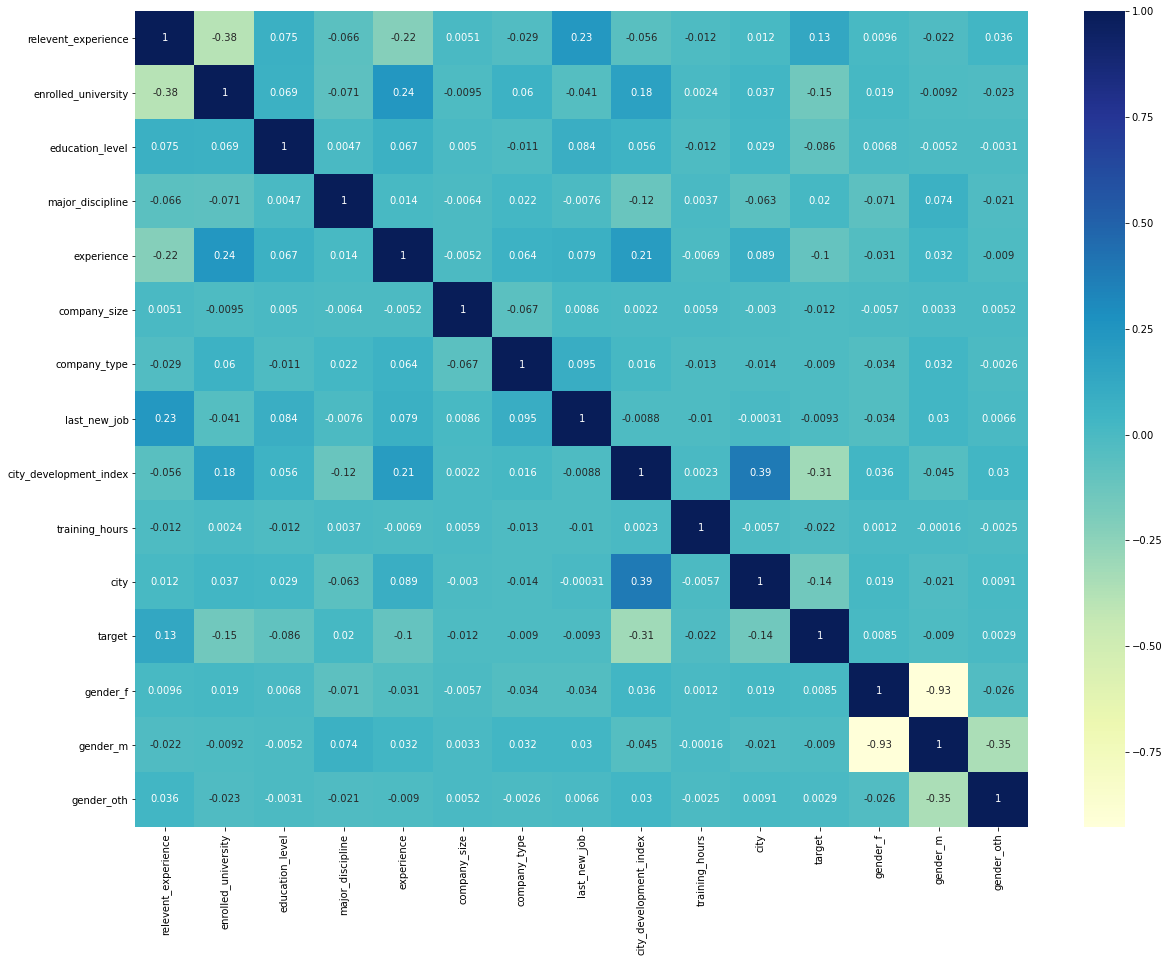

In [31]:
plt.subplots(figsize=(20,15))
sb.heatmap(final_df.corr(),annot_kws={"size": 10} ,annot=True,cmap='YlGnBu',)

How we can see, we don`t have strong correlation.

In [32]:
final_df.describe()

,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,city,target,gender_f,gender_m,gender_oth
count,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,1.915800e+04,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000,19158.000000
mean,0.280092,2.265505,0.707816,4.661322,2.070781,3.062689,4.235991,1.921307,2.140017e-16,65.366896,80.128876,0.249348,0.064621,0.925410,0.009970
std,0.449056,1.226131,0.990206,0.944310,1.811676,1.730788,1.250360,2.149301,1.000026e+00,60.058462,46.413570,0.432647,0.245861,0.262736,0.099352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.770639e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,5.000000,0.000000,2.000000,4.136197,0.000000,-1.083456e+00,23.000000,21.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,0.000000,5.000000,2.000000,3.039325,5.000000,1.000000,5.464346e-01,47.000000,101.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,2.000000,5.000000,3.000000,4.000000,5.000000,4.000000,8.213261e-01,88.000000,104.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,4.000000,5.000000,5.000000,7.000000,5.000000,6.000000,1.351705e+00,336.000000,180.000000,1.000000,1.000000,1.000000,1.000000


## 3. Checking for imbalance and separate data to train and test

0.0    14381
1.0     4777
Name: target, dtype: int64


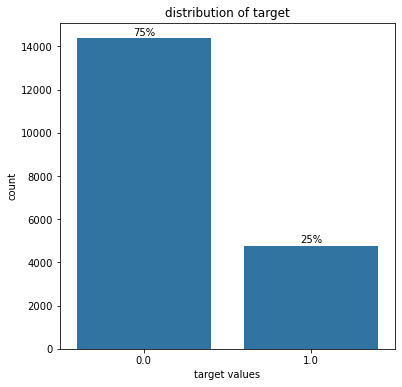

In [33]:
count = final_df.target.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(final_df.target,color = sb.color_palette()[0]);
plt.title('distribution of target');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /final_df.target.count()))+'%',
              ha='center',
              va = 'top')
    

There is a huge imbalance in data so we should handle it by using an oversampling technique

Oversampling using SMOTE:

In [34]:
y_true = final_df["target"]
final_df["target"].value_counts(normalize=True)
X = final_df.drop('target',1)
y = final_df.target


svm_smote = SMOTE( random_state=42,k_neighbors=5) #,sampling_strategy='minority', k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train, y_test = train_test_split(X_svm_smote,y_svm_smote, test_size=0.3, random_state=42)

And Standardize our data:

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_svm)

X_test = sc.transform(X_test_svm)


0.0    14381
1.0    14381
Name: target, dtype: int64


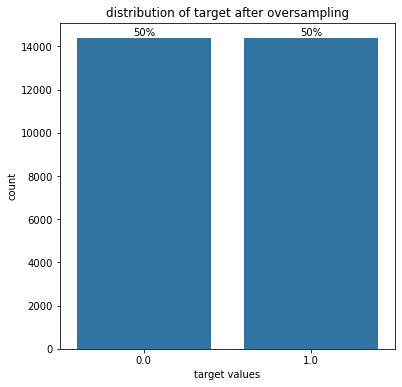

In [36]:
count = y_svm_smote.value_counts()
print( count )
plt.figure(figsize = (6,6))
sb.countplot(y_svm_smote,color = sb.color_palette()[0]);
plt.title('distribution of target after oversampling');
plt.xlabel('target values');
plt.ylabel('count');
for i in range(count.shape[0]):
    plt.text( 
            i,
            count[i] + 500,
            str(round(100*count[i] /y_svm_smote.count()))+'%',
              ha='center',
              va = 'top')

## 4. Train algorithms

### KNeighborsClassifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#попробуем модель при разных значениях кол-во соседей
for n_neighbors in range (1, 10): 
    KN_clf = KNeighborsClassifier(n_neighbors,algorithm='brute')
    KN_clf.fit(X_train, y_train)
    score = cross_val_score(KN_clf, X_train, y_train, cv=2, scoring="accuracy")
    print("Sums of estimates KN_clf with {} neighbors : {}; Mean: {}".format(n_neighbors, score, np.mean(score)))

Sums of estimates KN_clf with 1 neighbors : [0.74550512 0.75452017]; Mean: 0.7500126413115575
Sums of estimates KN_clf with 2 neighbors : [0.71679746 0.72173654]; Mean: 0.7192669979407392
Sums of estimates KN_clf with 3 neighbors : [0.7468958  0.73981721]; Mean: 0.7433565022949458
Sums of estimates KN_clf with 4 neighbors : [0.73269097 0.73316114]; Mean: 0.7329260534983857
Sums of estimates KN_clf with 5 neighbors : [0.74222708 0.7442877 ]; Mean: 0.7432573898729101
Sums of estimates KN_clf with 6 neighbors : [0.73785636 0.73773098]; Mean: 0.7377936689667011
Sums of estimates KN_clf with 7 neighbors : [0.74242575 0.74319491]; Mean: 0.74281033053112
Sums of estimates KN_clf with 8 neighbors : [0.7414324  0.74190344]; Mean: 0.7416679201071479
Sums of estimates KN_clf with 9 neighbors : [0.74192908 0.74319491]; Mean: 0.7425619943833104


How we can see, best results for 1 neighbors

In [38]:
KN_clf = KNeighborsClassifier(1,algorithm='brute') 
KN_clf.fit(X_train, y_train) 
y_final = KN_clf.predict(X_test)
final_score = accuracy_score(y_test, y_final)
print("{} final score: {}".format("KNeighborsClassifier", final_score))

KNeighborsClassifier final score: 0.7908216479313941


We need more strong algorithm for oor task

### Neural Network

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(Dense(256,input_dim=14,activation = "relu"))
model.add(Dense(512,activation = "relu"))
model.add(Dense(1028,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3840      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 1028)              527364    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1029      
Total params: 663,817
Trainable params: 663,817
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),

               optimizer=tf.optimizers.Adam(),

                metrics = ['accuracy'])

In [42]:
model.fit(X_train, y_train,epochs = 30)

Epoch 1/30
630/630 [==============================] - 4s 6ms/step - loss: 0.5776 - accuracy: 0.7034
Epoch 2/30
630/630 [==============================] - 3s 5ms/step - loss: 0.5223 - accuracy: 0.7561
Epoch 3/30
630/630 [==============================] - 4s 7ms/step - loss: 0.4813 - accuracy: 0.7777
Epoch 4/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4689 - accuracy: 0.7834
Epoch 5/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4541 - accuracy: 0.7906
Epoch 6/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4484 - accuracy: 0.7946
Epoch 7/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4321 - accuracy: 0.8072
Epoch 8/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4250 - accuracy: 0.8069
Epoch 9/30
630/630 [==============================] - 4s 7ms/step - loss: 0.4184 - accuracy: 0.8134
Epoch 10/30
630/630 [==============================] - 4s 6ms/step - loss: 0.4011 - accuracy: 0.8184

In [55]:
model.evaluate(X_test,y_test)

270/270 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.8087


[0.5433260202407837, 0.8086684346199036]

# 5. Last Homework

Let's try use sklearn.model_selection.GridSearchCV to find best combination of hyperparameters.

In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, make_scorer

alpha_arr = np.logspace(-3, 2, 21)
test_err_from_alpha = []
train_err_from_alpha = []
train_acc_from_alpha = []
test_acc_from_alpha = []

hidden_layer_sizes = np.asarray([50,100,150,250,350])
test_err_from_hls = []
train_err_from_hls = []
train_acc_from_hls = []
test_acc_from_hls = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err_from_alpha.append(np.mean(y_train != y_train_pred))
    test_err_from_alpha.append(np.mean(y_test != y_test_pred))
    train_acc_from_alpha.append(accuracy_score(y_train, y_train_pred))
    test_acc_from_alpha.append(accuracy_score(y_test, y_test_pred))
    
for hls in hidden_layer_sizes:
    mlp_model = MLPClassifier(alpha = 0.1, hidden_layer_sizes = (hls,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err_from_hls.append(np.mean(y_train != y_train_pred))
    test_err_from_hls.append(np.mean(y_test != y_test_pred))
    train_acc_from_hls.append(accuracy_score(y_train, y_train_pred))
    test_acc_from_hls.append(accuracy_score(y_test, y_test_pred))
    


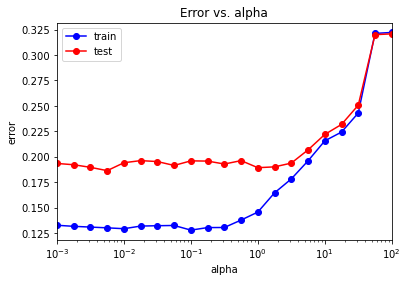

In [137]:
plt.semilogx(alpha_arr, train_err_from_alpha, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err_from_alpha, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

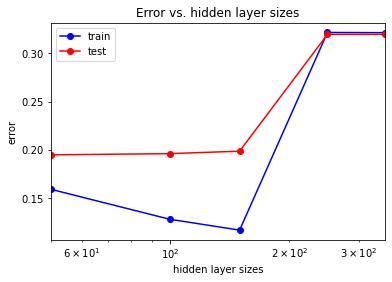

In [138]:
plt.semilogx(hidden_layer_sizes, train_err_from_hls, 'b-o', label = 'train')
plt.semilogx(hidden_layer_sizes, test_err_from_hls, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_sizes), np.max(hidden_layer_sizes)])
plt.title('Error vs. hidden layer sizes')
plt.xlabel('hidden layer sizes')
plt.ylabel('error')
plt.legend()

## Summary

We conducted research on the HR Analytics: Job Change of Data Scientists database, as we can see, the neural network showed the best result with an accuracy of 80%, this result can definitely be improved by selecting the necessary model hyperparameters.

In the last part of the work, we trained an MLPClassifier with one hidden layer and identified the best hyperparameters for this model. It turned out that this model shows the least error when the parameter alpha = 0.1 and the number of hidden layers is 150. The model is prone to overfitting with a large number of hidden layers.